In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
data = pd.read_csv("C:\Repositorios\Simulacao_MIT\Classificador\MLP\dataset\csv_files\Todos\comp_freq_dataset.csv", usecols=["Failure", "Type", "L_freq", "R_freq"])
data

,Failure,Type,L_freq,R_freq
0,1.0,1.0,0.967575,1.017101
1,1.0,1.0,1.020296,1.442318
2,1.0,1.0,0.000000,1.024148
3,1.0,2.0,0.000000,0.000000
4,1.0,2.0,1.601004,1.866554
...,...,...,...,...
310,0.0,20.0,0.603626,0.699317
311,0.0,20.0,0.607677,0.576581
312,0.0,21.0,1.129452,1.125842
313,0.0,21.0,1.072265,1.061493


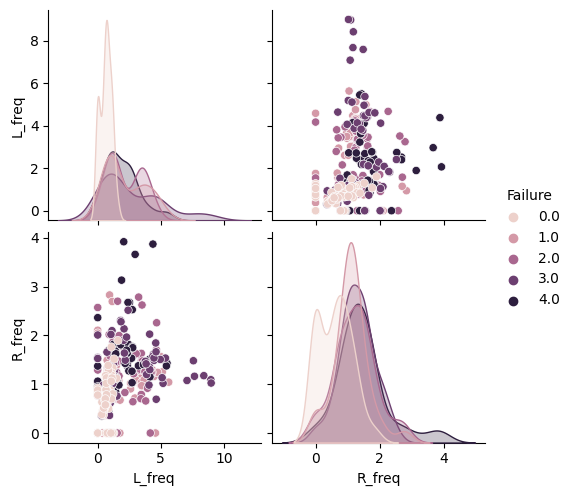

In [21]:
sns.pairplot( data=data, vars=('L_freq','R_freq'), hue='Failure' )

In [22]:
data.describe()

,Failure,Type,L_freq,R_freq
count,315.000000,315.000000,315.000000,315.000000
mean,2.000000,11.000000,1.911723,1.133638
std,1.416464,6.064935,1.697996,0.675032
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,6.000000,0.764180,0.730592
50%,2.000000,11.000000,1.219135,1.121412
75%,3.000000,16.000000,2.983508,1.492634
max,4.000000,21.000000,8.997935,3.918928


In [23]:
df_norm = data[['L_freq', 'R_freq']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm

,L_freq,R_freq
0,0.107533,0.259536
1,0.113392,0.368039
2,0.000000,0.261334
3,0.000000,0.000000
4,0.177930,0.476292
...,...,...
310,0.067085,0.178446
311,0.067535,0.147127
312,0.125523,0.287283
313,0.119168,0.270863


In [24]:
target = data.Failure
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,L_freq,R_freq,Failure
276,0.065049,0.137539,0.0
111,0.338643,0.414727,2.0
118,0.127822,0.230841,2.0
309,0.075612,0.259414,0.0
25,0.131111,0.375801,1.0


In [25]:
df.insert(3, "Normal", 0)

In [26]:
for i in range(315):
    if(df.Failure[i] > 0):
        df.Normal[i] = 1
df

C:\Users\joao_brasil\AppData\Local\Temp\ipykernel_23372\3593829914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Normal[i] = 1


,L_freq,R_freq,Failure,Normal
0,0.107533,0.259536,1.0,1
1,0.113392,0.368039,1.0,1
2,0.000000,0.261334,1.0,1
3,0.000000,0.000000,1.0,1
4,0.177930,0.476292,1.0,1
...,...,...,...,...
310,0.067085,0.178446,0.0,0
311,0.067535,0.147127,0.0,0
312,0.125523,0.287283,0.0,0
313,0.119168,0.270863,0.0,0


In [27]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['L_freq','R_freq']]# taking the training data features
trainY=train.Failure# output of our training data
testX= test[['L_freq','R_freq']] # taking test data features
testY =test.Failure   #output value of test data
trainX.head(5)

,L_freq,R_freq
90,0.092154,0.198128
189,0.000000,0.000000
308,0.052530,0.130531
113,0.360756,0.710626
240,0.787205,0.274633


In [28]:
trainY.head(5)

90     2.0
189    3.0
308    0.0
113    2.0
240    3.0
Name: Failure, dtype: float64

In [29]:
trainX.head(5)

,L_freq,R_freq
90,0.092154,0.198128
189,0.000000,0.000000
308,0.052530,0.130531
113,0.360756,0.710626
240,0.787205,0.274633


In [30]:
clf = MLPClassifier(activation = 'tanh', solver='sgd', learning_rate= 'adaptive', learning_rate_init= 0.01, alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1, max_iter = 2000, verbose = True, n_iter_no_change=100)

In [31]:
clf.fit(trainX, trainY)

Iteration 1, loss = 1.62137079
Iteration 2, loss = 1.62038030
Iteration 3, loss = 1.61872065
Iteration 4, loss = 1.61564110
Iteration 5, loss = 1.61266433
Iteration 6, loss = 1.61002197
Iteration 7, loss = 1.60766106
Iteration 8, loss = 1.60590756
Iteration 9, loss = 1.60419663
Iteration 10, loss = 1.60258059
Iteration 11, loss = 1.60090314
Iteration 12, loss = 1.59952485
Iteration 13, loss = 1.59835852
Iteration 14, loss = 1.59735150
Iteration 15, loss = 1.59634460
Iteration 16, loss = 1.59579118
Iteration 17, loss = 1.59514907
Iteration 18, loss = 1.59486183
Iteration 19, loss = 1.59454113
Iteration 20, loss = 1.59430216
Iteration 21, loss = 1.59451858
Iteration 22, loss = 1.59399578
Iteration 23, loss = 1.59362813
Iteration 24, loss = 1.59338728
Iteration 25, loss = 1.59339731
Iteration 26, loss = 1.59362494
Iteration 27, loss = 1.59337705
Iteration 28, loss = 1.59249489
Iteration 29, loss = 1.59183963
Iteration 30, loss = 1.59134400
Iteration 31, loss = 1.59085128
Iteration 32, los

c:\Users\joao_brasil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(5, 5),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=2000,
              n_iter_no_change=100, random_state=1, solver='sgd', verbose=True)

In [32]:
prediction = clf.predict(testX)
print(prediction)

[2. 4. 3. 3. 0. 0. 1. 2. 1. 0. 3. 3. 4. 4. 2. 4. 4. 0. 4. 4. 2. 0. 0. 3.
 2. 0. 0. 2. 0. 1. 0. 4. 4. 0. 1. 0. 1. 2. 3. 1. 2. 3. 0. 0. 0. 0. 4. 4.
 3. 3. 2. 0. 4. 3. 0. 0. 0. 4. 0. 0. 1. 0. 4. 1. 0. 0. 2. 1. 2. 4. 4. 2.
 2. 0. 3. 0. 0. 0. 0. 3. 2. 3. 4. 1. 4. 0. 0. 3. 2. 2. 1. 0. 2. 3. 0.]


In [33]:
print(testY.values)

[4. 3. 0. 1. 0. 1. 1. 3. 1. 0. 1. 1. 2. 1. 4. 2. 3. 2. 4. 4. 2. 4. 0. 3.
 2. 0. 3. 1. 3. 1. 0. 3. 4. 0. 3. 1. 1. 4. 3. 2. 2. 3. 2. 2. 2. 4. 1. 4.
 3. 1. 4. 3. 2. 0. 4. 1. 0. 2. 4. 2. 2. 0. 3. 1. 2. 0. 3. 1. 4. 3. 2. 2.
 3. 0. 4. 0. 0. 0. 2. 3. 4. 0. 1. 2. 1. 0. 0. 1. 2. 4. 2. 4. 4. 4. 3.]


In [34]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

The accuracy of the Multi-layer Perceptron is: 0.3684210526315789


In [35]:
print('The f1-score of the Multi-layer Perceptron is:',metrics.f1_score(prediction,testY, average= 'weighted'))

The f1-score of the Multi-layer Perceptron is: 0.3886991080342881
